In [37]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
np.random.seed(2017)
mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [38]:
X4 = X[y==4,:]
X9 = X[y==9,:]
print(X4.shape)
print(X9.shape)

(6824, 784)
(6958, 784)


In [39]:
training_set = np.concatenate((X4[0:4000,:], X9[0:4000,:]), axis=0)
print(training_set.shape)
y4 = np.ones(4000)*4;
y9 = np.ones(4000)*9;
training_set_labels = np.concatenate((y4[0:4000], y9[0:4000]), axis=0)
print(training_set_labels.shape)
testing_set = np.concatenate((X4[4000:,:], X9[4000:,:]), axis=0)
print(testing_set.shape)
y4_test = np.ones(2824)*4;
y9_test = np.ones(2958)*9;
testing_set_labels = np.concatenate((y4_test[0:2824], y9_test[0:2958]), axis=0)
print(testing_set_labels.shape)

(8000, 784)
(8000,)
(5782, 784)
(5782,)


In [40]:
pe = []
C_range = 10. ** np.arange(-3, 8)
for C in C_range:
    clf = svm.SVC(C, kernel='poly', degree = 1)
    X_train, X_test, y_train, y_test = train_test_split(training_set, training_set_labels, test_size=0.33, random_state=np.random.randint(1,100))
    clf.fit(X_train,y_train)
    pee = 1 - clf.score(X_test, y_test)
    pe.append(pee)
    print("Probability of error: ", pee,"for C = ", C)
    print("Number of support vectors: ", (len(clf.support_vectors_)))
    print("Score: ", clf.score(X_test, y_test))
    
print("The best value of C: ", C_range[pe.index(min(pe))])
clf_new_1 = svm.SVC(C_range[pe.index(min(pe))], kernel='poly', degree = 1)
clf_new_1.fit(training_set, training_set_labels)
print("Number of support vectors for best classifier: ", (len(clf_new_1.support_vectors_)))
print("Score: ", clf_new_1.score(testing_set, testing_set_labels))
print("Probability of error: ", (1 - clf_new_1.score(testing_set, testing_set_labels)))

Probability of error:  0.0310606060606 for C =  0.001
Number of support vectors:  594
Score:  0.968939393939
Probability of error:  0.0363636363636 for C =  0.01
Number of support vectors:  453
Score:  0.963636363636
Probability of error:  0.0443181818182 for C =  0.1
Number of support vectors:  408
Score:  0.955681818182
Probability of error:  0.0537878787879 for C =  1.0
Number of support vectors:  366
Score:  0.946212121212
Probability of error:  0.0496212121212 for C =  10.0
Number of support vectors:  365
Score:  0.950378787879
Probability of error:  0.0507575757576 for C =  100.0
Number of support vectors:  366
Score:  0.949242424242
Probability of error:  0.0522727272727 for C =  1000.0
Number of support vectors:  348
Score:  0.947727272727
Probability of error:  0.0518939393939 for C =  10000.0
Number of support vectors:  363
Score:  0.948106060606
Probability of error:  0.0481060606061 for C =  100000.0
Number of support vectors:  367
Score:  0.951893939394
Probability of erro

[2177 5455 4736 1612 3167 6290 6380 1995 7055 2735 2468 7953 5234 1333 6567
 2356]


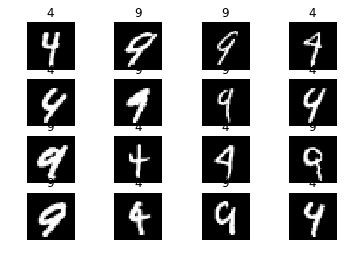

In [41]:
'''
## The below code takes the support vector that were misclassified as well as closest to the hyperplane. 
## But, since we need only the points that violate the margin, as they might be the hardest to classify...


dec = clf_new_rbf.decision_function(testing_set) # is this only for the testing set? 
# neg is seen as 4, pos is seen as 9
# Distance of the samples X to the separating hyperplane.
four_outlier = []
four_outlier_index = []
nine_outlier = []
nine_outlier_index = []
for i in range(0,2824):
    if (dec[i] > 0):
        four_outlier.append(dec[i])
        four_outlier_index.append(i)
for i in range(2824,5782):
    if (dec[i] < 0):
        nine_outlier.append(dec[i])
        nine_outlier_index.append(i)
print(len(four_outlier))
print(len(nine_outlier))
nine_outlier = [abs(x) for x in nine_outlier]
outlier_list = four_outlier + nine_outlier
outlier_list_index = four_outlier_index + nine_outlier_index

N = len(outlier_list)
final_index = np.zeros(len(outlier_list_index))
sortted = np.argsort(outlier_list)[:N] #[::-1] using -1 will reverse and do descending order. We only want the vectors
# that are closest to the hyperplane. 
print(sortted)
for i in range(0,len(outlier_list_index)):
    final_index[i] = outlier_list_index[sortted[i]]
final_index

'''


dec = clf_new_1.decision_function(training_set) # is this only for the testing set? 
dec = np.argsort(np.abs(dec))[:16]
print(dec)
j = 0
f1, axarr1 = plt.subplots(4, 4)
for i in range(0,4):
    for ii in range(0,4):
        a = int(dec[j])
        j = j + 1
        axarr1[i,ii].imshow((training_set[a]).reshape((28,28)), cmap='gray')
        axarr1[i,ii].axis('off')
        axarr1[i,ii].set_title('{label}'.format(label=int(training_set_labels[a])))
        ...
plt.show()

In [42]:
pe = []
C_range = 10. ** np.arange(-3, 8)
for C in C_range:
    clf = svm.SVC(C, kernel='poly', degree = 2)
    X_train, X_test, y_train, y_test = train_test_split(training_set, training_set_labels, test_size=0.33, random_state=np.random.randint(1,100))
    clf.fit(X_train,y_train)
    pee = 1 - clf.score(X_test, y_test)
    pe.append(pee)
    print("Probability of error: ", pee,"for C = ", C)
    print("Number of support vectors: ", (len(clf.support_vectors_)))
    print("Score: ", clf.score(X_test, y_test))
    
print("The best value of C: ", C_range[pe.index(min(pe))])
clf_new_2 = svm.SVC(C_range[pe.index(min(pe))], kernel='poly', degree = 2)
clf_new_2.fit(training_set, training_set_labels)
print("Number of support vectors for best classifier: ", (len(clf_new_2.support_vectors_)))
print("Score: ", clf_new_2.score(testing_set, testing_set_labels))
print("Probability of error: ", (1 - clf_new_2.score(testing_set, testing_set_labels)))

Probability of error:  0.0117424242424 for C =  0.001
Number of support vectors:  536
Score:  0.988257575758
Probability of error:  0.00984848484848 for C =  0.01
Number of support vectors:  570
Score:  0.990151515152
Probability of error:  0.0170454545455 for C =  0.1
Number of support vectors:  542
Score:  0.982954545455
Probability of error:  0.0109848484848 for C =  1.0
Number of support vectors:  544
Score:  0.989015151515
Probability of error:  0.0136363636364 for C =  10.0
Number of support vectors:  560
Score:  0.986363636364
Probability of error:  0.0136363636364 for C =  100.0
Number of support vectors:  560
Score:  0.986363636364
Probability of error:  0.0143939393939 for C =  1000.0
Number of support vectors:  565
Score:  0.985606060606
Probability of error:  0.0109848484848 for C =  10000.0
Number of support vectors:  541
Score:  0.989015151515
Probability of error:  0.0143939393939 for C =  100000.0
Number of support vectors:  565
Score:  0.985606060606
Probability of err

[5990 4753 6674 4637 4812 7202 7593 7927 4586 4072 7580 4934 2946 1821 6123
 6113]


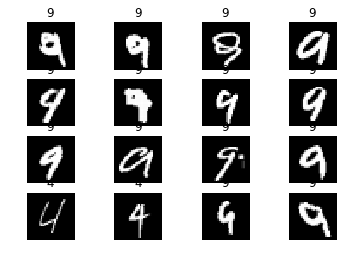

In [43]:
dec = clf_new_2.decision_function(training_set) # is this only for the testing set? 
dec = np.argsort(np.abs(dec))[:16]
print(dec)
j = 0
f1, axarr1 = plt.subplots(4, 4)
for i in range(0,4):
    for ii in range(0,4):
        a = int(dec[j])
        j = j + 1
        axarr1[i,ii].imshow((training_set[a]).reshape((28,28)), cmap='gray')
        axarr1[i,ii].axis('off')
        axarr1[i,ii].set_title('{label}'.format(label=int(training_set_labels[a])))
        ...
plt.show()

In [44]:
gamma_range = 10. ** np.arange(-9, -6)
C_range = 10. ** np.arange(-1, 4)      
#C_range = 10. ** np.arange(-1, 1)
#gamma_range = 10. ** np.arange(-1, 1)
pefinal = []
gammalist = [] 
for C in C_range:
    pe = []
    for gamma in gamma_range: 
        clf = svm.SVC(C, kernel='rbf', gamma = gamma)
        X_train, X_test, y_train, y_test = train_test_split(training_set, training_set_labels, test_size=0.33, random_state=np.random.randint(1,100))
        clf.fit(X_train,y_train)
        pee = 1 - clf.score(X_test, y_test)
        pe.append(pee)
        print("Probability of error: ", pee,"for C = ", C, " and for gamma = ", gamma)
        print("Number of support vectors: ", (len(clf.support_vectors_)))
        print("Score: ", clf.score(X_test, y_test))
    gammalist.append(gamma_range[pe.index(min(pe))])
    print("Best gamma: ", gamma_range[pe.index(min(pe))], " for C = ", C)
    pefinal.append(pe[pe.index(min(pe))])
    
print("The best pair of C and gamma: ", C_range[pefinal.index(min(pefinal))], gammalist[pefinal.index(min(pefinal))])
clf_new_rbf = svm.SVC(C_range[pefinal.index(min(pefinal))], kernel='rbf', gamma = gammalist[pefinal.index(min(pefinal))])
clf_new_rbf.fit(training_set, training_set_labels)
print("Number of support vectors for best classifier: ", (len(clf_new_rbf.support_vectors_)))
print("Score: ", clf_new_rbf.score(testing_set, testing_set_labels))
print("Probability of error: ", (1 - clf_new_rbf.score(testing_set, testing_set_labels)))

Probability of error:  0.503787878788 for C =  0.1  and for gamma =  1e-09
Number of support vectors:  5340
Score:  0.496212121212
Probability of error:  0.0814393939394 for C =  0.1  and for gamma =  1e-08
Number of support vectors:  4388
Score:  0.918560606061
Probability of error:  0.032196969697 for C =  0.1  and for gamma =  1e-07
Number of support vectors:  2204
Score:  0.967803030303
Best gamma:  1e-07  for C =  0.1
Probability of error:  0.0719696969697 for C =  1.0  and for gamma =  1e-09
Number of support vectors:  4348
Score:  0.92803030303
Probability of error:  0.0378787878788 for C =  1.0  and for gamma =  1e-08
Number of support vectors:  1947
Score:  0.962121212121
Probability of error:  0.0242424242424 for C =  1.0  and for gamma =  1e-07
Number of support vectors:  947
Score:  0.975757575758
Best gamma:  1e-07  for C =  1.0
Probability of error:  0.0435606060606 for C =  10.0  and for gamma =  1e-09
Number of support vectors:  1902
Score:  0.956439393939
Probability o

[7533 4730 6431 1612 3417 6176 5454 3386 5470 6123 3161 7721 1859 2206 1504
 1413]


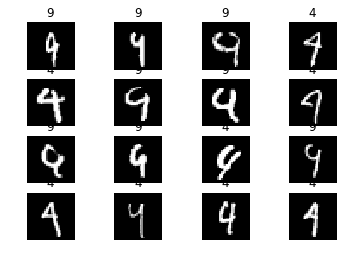

In [45]:
dec = clf_new_rbf.decision_function(training_set) # is this only for the testing set? 
dec = np.argsort(np.abs(dec))[:16]
print(dec)
j = 0
f1, axarr1 = plt.subplots(4, 4)
for i in range(0,4):
    for ii in range(0,4):
        a = int(dec[j])
        j = j + 1
        axarr1[i,ii].imshow((training_set[a]).reshape((28,28)), cmap='gray')
        axarr1[i,ii].axis('off')
        axarr1[i,ii].set_title('{label}'.format(label=int(training_set_labels[a])))
        ...
plt.show()